In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("youtube_ad_revenue_dataset.csv")
print(df.shape)
print(df.dtypes)
df.head()

(122400, 12)
video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [3]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(2400)

In [5]:
df["date"]=pd.to_datetime(df["date"])

(array([3209., 3885., 4016., 3996., 4057., 4052., 3906., 4027., 4184.,
        4074., 4050., 4089., 3983., 4036., 4094., 4047., 4013., 4025.,
        4019., 4104., 4041., 4043., 4087., 3929., 4020., 4149., 4017.,
        4012., 3520.,  611.]),
 array([14659.10556184, 16222.3910461 , 17785.67653035, 19348.96201461,
        20912.24749886, 22475.53298312, 24038.81846737, 25602.10395163,
        27165.38943588, 28728.67492014, 30291.96040439, 31855.24588865,
        33418.5313729 , 34981.81685716, 36545.10234141, 38108.38782567,
        39671.67330992, 41234.95879418, 42798.24427843, 44361.52976268,
        45924.81524694, 47488.10073119, 49051.38621545, 50614.6716997 ,
        52177.95718396, 53741.24266821, 55304.52815247, 56867.81363672,
        58431.09912098, 59994.38460523, 61557.67008949]),
 <BarContainer object of 30 artists>)

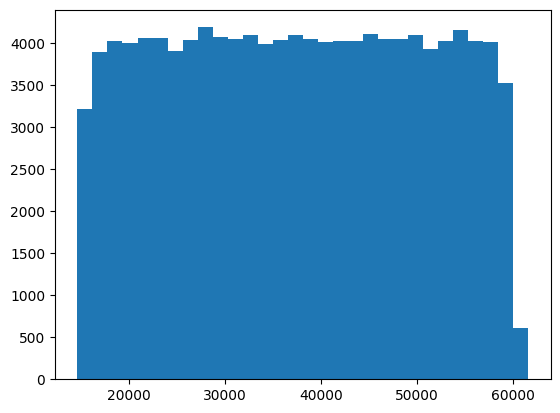

In [6]:
plt.hist(df["watch_time_minutes"].dropna(),bins=30)

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
num_cols=["likes","comments","watch_time_minutes"]
df[num_cols]=imputer.fit_transform(df[num_cols])
df.isnull().sum()
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [8]:
df.dtypes   

video_id                        object
date                    datetime64[ns]
views                            int64
likes                          float64
comments                       float64
watch_time_minutes             float64
video_length_minutes           float64
subscribers                      int64
category                        object
device                          object
country                         object
ad_revenue_usd                 float64
dtype: object

In [9]:
df["likes"]=df["likes"].astype(int)
df["comments"]=df["comments"].astype(int)

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df["engagement_rate"]=(df["likes"]+df["comments"])/df["views"]

In [17]:
cat_cols = ['category', 'device', 'country']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,203.178237,0.155093,...,False,False,False,True,False,False,False,True,False,False
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,140.880508,0.098632,...,False,False,False,False,True,True,False,False,False,False
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,360.134008,0.214519,...,False,False,False,True,False,True,False,False,False,False
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,224.638261,0.142814,...,False,False,True,False,False,False,False,False,True,False
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,165.514388,0.236121,...,False,False,True,False,False,True,False,False,False,False


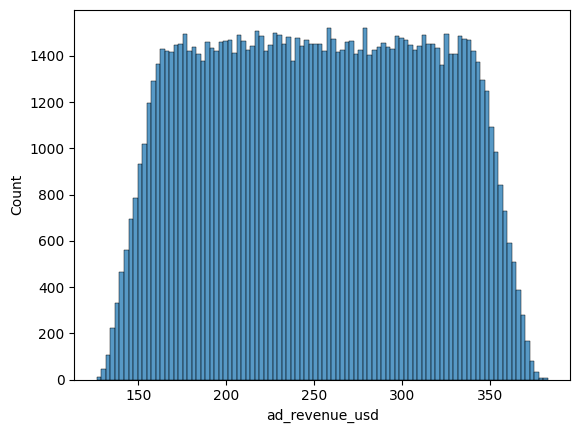

In [12]:
sns.histplot(df["ad_revenue_usd"].dropna(),bins=100)
plt.show()

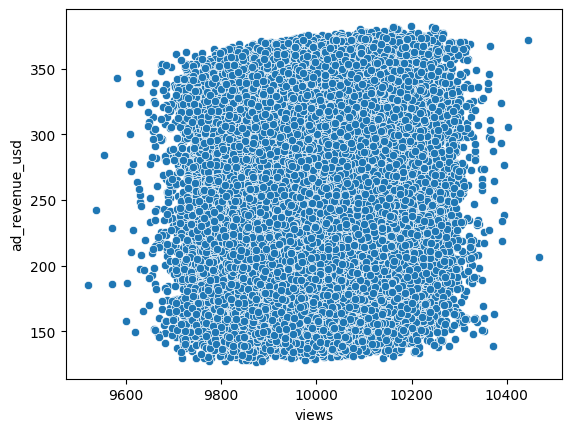

In [13]:
sns.scatterplot(data=df.sample(5000),x=df["views"],y=df["ad_revenue_usd"])
plt.show()

In [18]:
df.to_csv("youtube_ad_revenue_cleaned.csv",index=False)